In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns

In this analysis, we study the percolation theory in a randomly generated graph, focusing on the transition from local clusters to a giant cluster as the edge probabilities change. We use a log-normal distribution to model the probability of each edge being considered for inclusion in the graph. The log-normal distribution is chosen due to its ability to represent a wide range of values, with most probabilities concentrated around a specific value (determined by the mean and standard deviation of the underlying normal distribution).

The log-normal distribution is derived from an underlying normal distribution with a mean (μ) and standard deviation (σ). The probability distribution function of a log-normal distribution is given by:

\begin{equation}
p(x) = \frac{1}{x\sigma\sqrt{2\pi}} \cdot e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}
\end{equation}

To generate the graph, we first create an empty graph with a specified number of nodes (n). For each pair of nodes, we generate a random probability value using a log-normal distribution with specified mean (μ) and standard deviation (σ) of the underlying normal distribution. Then, we compare the generated probability value to an edge consideration probability (p), and if the generated probability value is less than p, we add an edge between the two nodes. By varying p, we can control the sparseness or density of the graph.

To analyze the graph, we identify the connected components (clusters) and determine the size of the largest connected component (giant cluster). We then calculate the giant cluster ratio by dividing the size of the giant cluster by the total number of nodes in the graph. This ratio serves as an indicator of the extent to which the graph is dominated by a single large cluster.

We perform the following steps to generate the phase diagram and heatmaps:

Generate the phase diagram by calculating the giant cluster ratio for varying edge consideration probabilities (p) and plot it against p. For each p value, we calculate the mean giant cluster ratio and the corresponding error (standard deviation) across multiple realizations.

Create a heatmap based on the mean of the log-normal distribution (μ) by calculating the giant cluster ratio for different combinations of edge consideration probability (p) and mean (μ) values. We average the giant cluster ratio over multiple realizations for each combination of p and μ.

Create another heatmap based on the standard deviation of the log-normal distribution (σ) by calculating the giant cluster ratio for different combinations of edge consideration probability (p) and standard deviation (σ) values. We average the giant cluster ratio over multiple realizations for each combination of p and σ.

By visualizing the phase diagram and heatmaps, we can observe the transition from local clusters to a giant cluster as the edge probabilities change. The phase diagram shows a sharp increase in the giant cluster ratio around a specific edge consideration probability, indicating the percolation threshold. The heatmaps provide additional insights into how the mean and standard deviation of the log-normal distribution influence the formation of the giant cluster.



In [2]:
# Define the edge probability distribution function
def edge_probability_distribution(mean, std_dev):
    return np.random.lognormal(mean, std_dev)

In [3]:
# Generate the graph using the log-normal distribution for edge probabilities
def generate_graph(n, mean, std_dev, p):
    G = nx.Graph()  # Create an empty graph
    G.add_nodes_from(range(n))  # Add n nodes numbered from 0 to n-1

    # Iterate through each pair of nodes
    for i in range(n):
        for j in range(i+1, n):
            # Get the probability for the current edge from the distribution
            if random.random() < p:
                edge_prob = edge_probability_distribution(mean, std_dev)
                # Add an edge between nodes i and j with the probability from the distribution
                if random.random() < edge_prob:
                    G.add_edge(i, j)
                
    return G

In [8]:
def draw_graph(G, title):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [9]:
# Calculate the giant cluster ratio for the graph

def analyze_graph(G):
    giant_cluster_size = 0  # Initialize giant cluster size to 0
    
    # Iterate through connected components of the graph
    for component in nx.connected_components(G):
        # Update the giant cluster size if the current component is larger
        if len(component) > giant_cluster_size:
            giant_cluster_size = len(component)

    return giant_cluster_size / G.number_of_nodes()  # Calculate the ratio of the giant cluster size to the total number of nodes


In [10]:
# Phase diagram values
n = 100  # Number of nodes
mean = -2.3  # Mean of the underlying normal distribution for edge probabilities
std_dev = 0.3  # Standard deviation of the underlying normal distribution for edge probabilities

# Define the range of edge probabilities to iterate over
p_values = np.linspace(0.01, 1, num=100)

# Initialize lists to store results
avg_ratios = []
std_devs = []

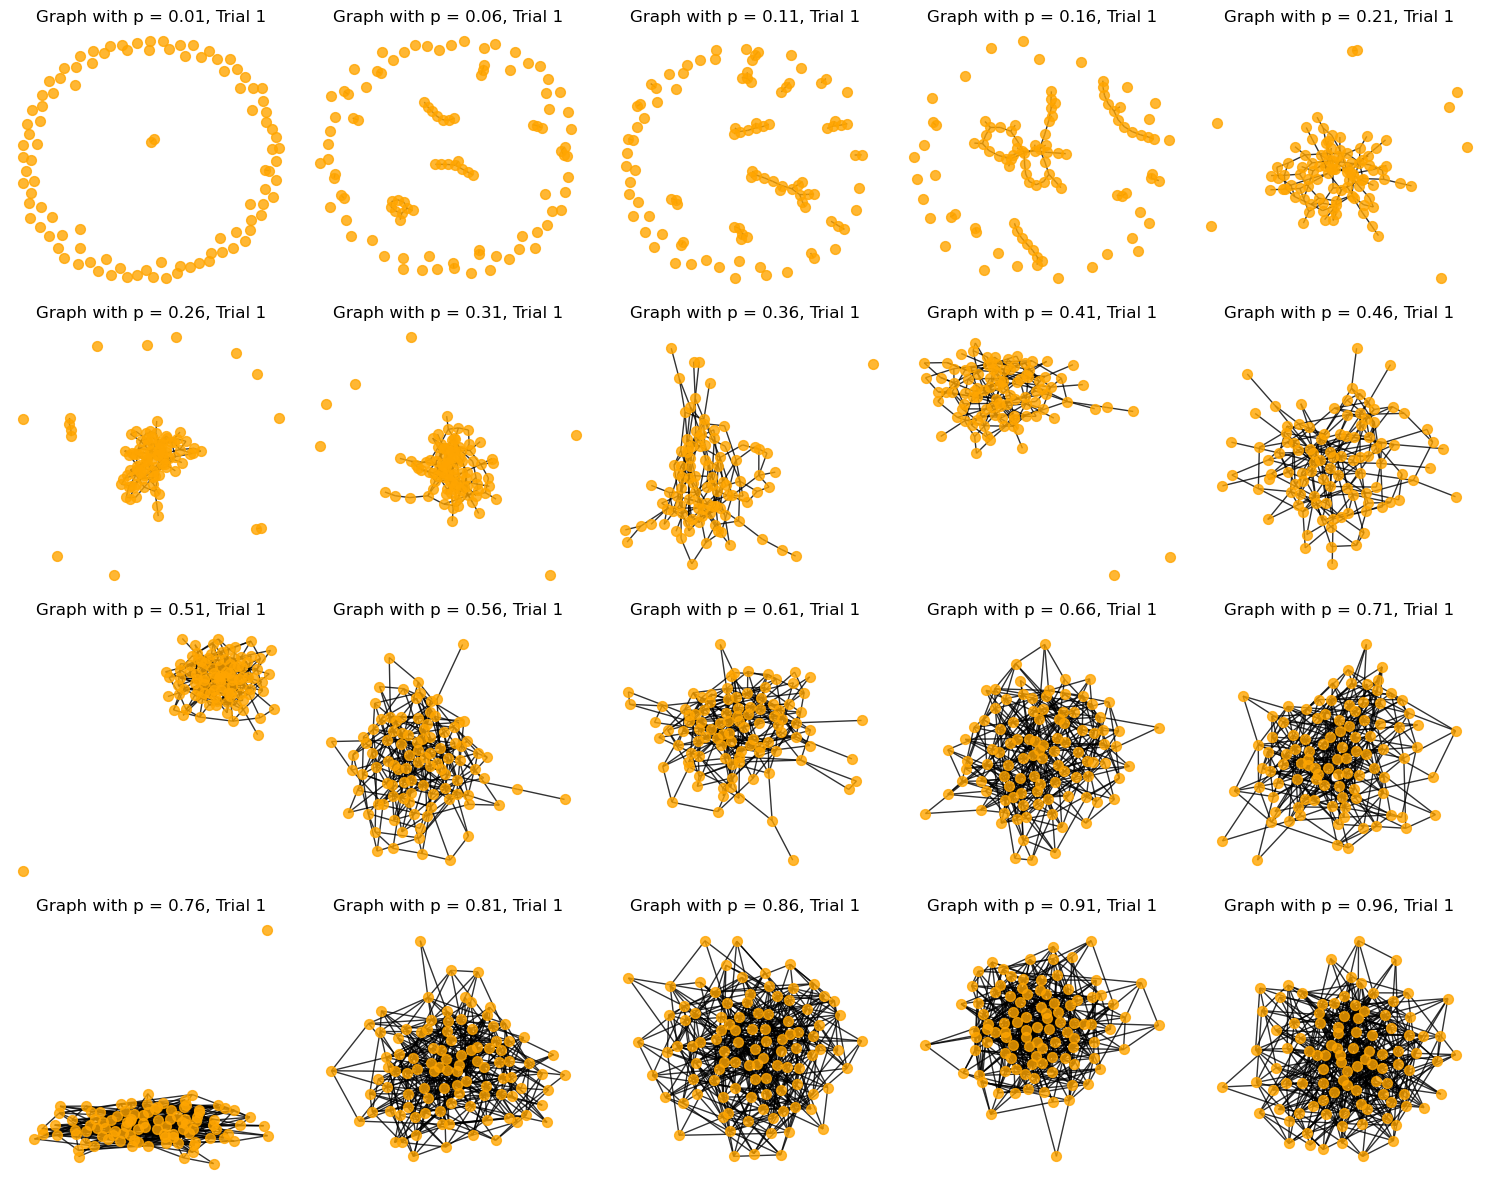

In [14]:
n_plots = len(p_values)/5
ncols = 5
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

# Phase diagram calculation
for idx, p in enumerate(p_values):
    ratios = []
    
    # Generate multiple graphs and calculate giant cluster ratio for each graph
    for i in range(10):
        G = generate_graph(n, mean, std_dev, p)
        giant_cluster_ratio = analyze_graph(G)
        ratios.append(giant_cluster_ratio)
        
        # Visualize the graph using draw_graph only for the first trial (i=0) and every 5 p_values
        if i == 0 and idx % 5 == 0:
            row, col = (idx // 5) // ncols, (idx // 5) % ncols
            ax = axes[row, col]
            pos = nx.spring_layout(G)
            nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8, ax=ax)
            ax.set_title(f'Graph with p = {p:.2f}, Trial {i+1}')
            ax.axis('off')
    # Calculate the mean and standard deviation of the giant cluster ratios for the current edge probability
    avg_ratio = np.mean(ratios)
    std_dev = np.std(ratios)
    
    # Append the results to the lists
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev)

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# Heatmap value and calculation
mean_values = np.linspace(-3, 0, num=20)
std_dev_values = np.linspace(0.01, 5, num=20)
p_values_heatmap = np.linspace(0.01, 1, num=20)

heatmap_data_mean = np.zeros((len(mean_values), len(p_values_heatmap)))
heatmap_data_std_dev = np.zeros((len(std_dev_values), len(p_values_heatmap)))

num_realizations = 20


for i, mean_value in enumerate(mean_values):
    for j, p_value in enumerate(p_values_heatmap):
        temp_ratios = []
        for _ in range(num_realizations):
            G = generate_graph(n, mean_value, std_dev, p_value)
            giant_cluster_ratio = analyze_graph(G)
            temp_ratios.append(giant_cluster_ratio)
        heatmap_data_mean[i, j] = np.mean(temp_ratios)

for i, std_dev_value in enumerate(std_dev_values):
    for j, p_value in enumerate(p_values_heatmap):
        temp_ratios = []
        for _ in range(num_realizations):
            G = generate_graph(n, mean, std_dev_value, p_value)
            giant_cluster_ratio = analyze_graph(G)
            temp_ratios.append(giant_cluster_ratio)
        heatmap_data_std_dev[i, j] = np.mean(temp_ratios)

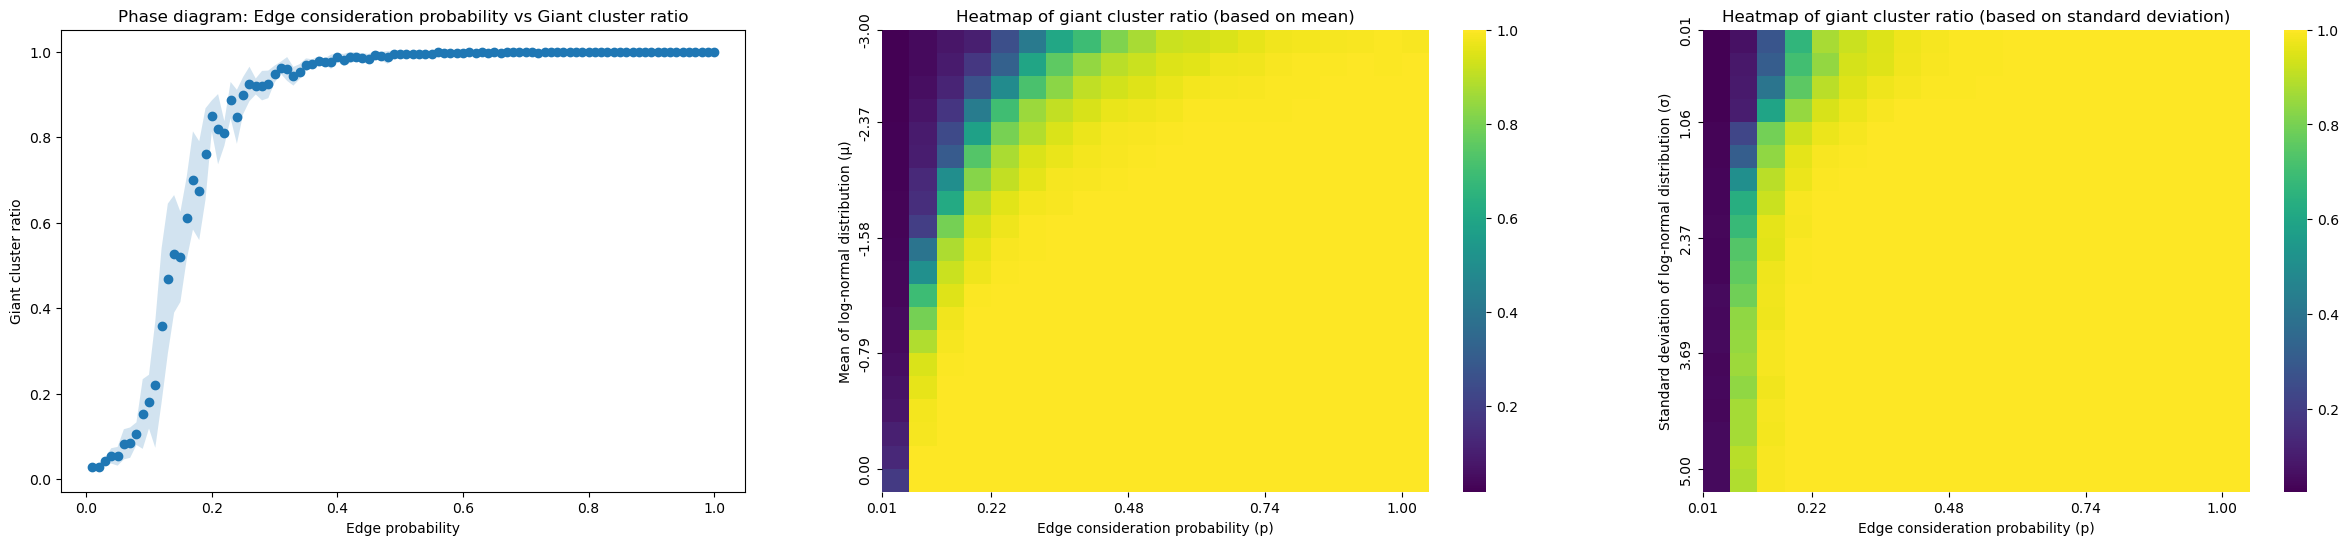

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 6))

# Plot phase diagram with shaded error region
ax1.plot(p_values, avg_ratios, 'o')
ax1.fill_between(p_values, np.array(avg_ratios) - np.array(std_devs), np.array(avg_ratios) + np.array(std_devs), alpha=0.2)
ax1.set_xlabel('Edge probability')
ax1.set_ylabel('Giant cluster ratio')
ax1.set_title('Phase diagram: Edge consideration probability vs Giant cluster ratio')

# Plot heatmap based on mean
sns.heatmap(heatmap_data_mean, cmap='viridis', ax=ax2)

# Set sparser tick labels for the heatmap based on mean
num_xticks = 5
num_yticks = 5

xtick_positions = np.linspace(0, len(p_values_heatmap) - 1, num_xticks, dtype=int)
xtick_labels = [f"{p_values_heatmap[i]:.2f}" for i in xtick_positions]
ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_labels)

ytick_positions = np.linspace(0, len(mean_values) - 1, num_yticks, dtype=int)
ytick_labels = [f"{mean_values[i]:.2f}" for i in ytick_positions]
ax2.set_yticks(ytick_positions)
ax2.set_yticklabels(ytick_labels)

ax2.set_xlabel('Edge consideration probability (p)')
ax2.set_ylabel('Mean of log-normal distribution (μ)')
ax2.set_title('Heatmap of giant cluster ratio (based on mean)')

# Plot heatmap based on standard deviation
sns.heatmap(heatmap_data_std_dev, cmap='viridis', ax=ax3)

# Set sparser tick labels for the heatmap based on standard deviation
num_xticks = 5
num_yticks = 5

xtick_positions = np.linspace(0, len(p_values_heatmap) - 1, num_xticks, dtype=int)
xtick_labels = [f"{p_values_heatmap[i]:.2f}" for i in xtick_positions]
ax3.set_xticks(xtick_positions)
ax3.set_xticklabels(xtick_labels)

ytick_positions = np.linspace(0, len(std_dev_values) - 1, num_yticks, dtype=int)
ytick_labels = [f"{std_dev_values[i]:.2f}" for i in ytick_positions]
ax3.set_yticks(ytick_positions)
ax3.set_yticklabels(ytick_labels)

ax3.set_xlabel('Edge consideration probability (p)')
ax3.set_ylabel('Standard deviation of log-normal distribution (σ)')
ax3.set_title('Heatmap of giant cluster ratio (based on standard deviation)')

plt.show()